In [2]:
## Blazers
## Run this notebooks on colab to get the new formed data

In [3]:
!pip install Catboost 

In [4]:
!pip install geopy

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from geopy.geocoders import Nominatim
from geopy.point import Point
import requests
from io import StringIO 

In [6]:
##function to reverse geocoded the coordinates to get locations for each latitude and longitude using the reversegeocoding python library

geolocator = Nominatim(user_agent="test")

def reverse_geocoding(lat, lon):
    try:
        location = geolocator.reverse(Point(lat, lon))
        return location.raw['display_name']
    except:
        return None

## Data preparation

In [7]:
pd.set_option('display.max_columns',63)

In [8]:
# share files via link to google drive

# links to the original data provided by zindi
train = 'https://drive.google.com/file/d/1TbYEl1aGrBfEzc0HtBGTXe7nX_3iz9Oe/view?usp=sharing'
test ='https://drive.google.com/file/d/12gp75-gfcWqTYuW5fD1MrBdHqCGBmuJ6/view?usp=sharing'

# function to read a csv file shared via google which returns a dataframe
#
def read_csv(url):
    url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
    csv_raw = requests.get(url).text
    csv = StringIO(csv_raw)
    df = pd.read_csv(csv)
    return df

# Creating training, testing dataframes
train = read_csv(train)
test = read_csv(test)

In [9]:
# Apply reverse_geocoding to the coordinates columns of the train data and adding a new address column on the train data
train['address'] = np.vectorize(reverse_geocoding)(train['lat'], train['lon'])

In [10]:
# making a new csv train data
train.to_csv("train_.csv")

In [11]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,...,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,address
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,...,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039,"Dutoitsput, Letsemeng Ward 1, Letsemeng Local ..."
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,...,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775,"Letsemeng Ward 2, Saundershoogte, Letsemeng Lo..."
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,...,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000,"Letsemeng Ward 3, Letsemeng Local Municipality..."
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,...,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778,"Letsemeng Ward 4, Letsemeng Local Municipality..."
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,...,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000,"Letsemeng Ward 5, Letsemeng Local Municipality..."


In [12]:
# Apply reverse_geocoding to the coordinates columns of the test data and adding a new address column on the test data

test['address'] = np.vectorize(reverse_geocoding)(test['lat'], test['lon'])

In [13]:
# making a new csv test data
test.to_csv("test_.csv")

In [14]:
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,address
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,"Camdeboo Ward 7, Camdeboo Local Municipality, ..."
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,"Camdeboo Ward 7, Camdeboo Local Municipality, ..."
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,"Ranonkel Street, Asherville, Camdeboo Ward 3, ..."
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,"Station Street, Spandauville, Camdeboo Ward 4,..."
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,"Aster Street, Camdeboo Ward 5, Graaff-Reinet, ..."


In [15]:
train = train.drop_duplicates()
test = test.drop_duplicates()

## Data exploratory

### Form analysis

In [16]:
df = train.copy()
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,...,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,address
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,...,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039,"Dutoitsput, Letsemeng Ward 1, Letsemeng Local ..."
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,...,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775,"Letsemeng Ward 2, Saundershoogte, Letsemeng Lo..."
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,...,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000,"Letsemeng Ward 3, Letsemeng Local Municipality..."
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,...,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778,"Letsemeng Ward 4, Letsemeng Local Municipality..."
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,...,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000,"Letsemeng Ward 5, Letsemeng Local Municipality..."


#### Target variable is the variable 'target'

In [17]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns in the dataset")

2822 rows and 64 columns in the dataset


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 0 to 2821
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

- **variable type**: 2 variables object typed ,the others are continuous(float and int).
- Object-typed variables represent location identifiers.

In [19]:
## missing values analysis
for col in df.columns:
    print(f"{col:-<50} {df[col].isna().sum()/df.shape[0]}")

ward---------------------------------------------- 0.0
total_households---------------------------------- 0.0
total_individuals--------------------------------- 0.0
target-------------------------------------------- 0.0
dw_00--------------------------------------------- 0.0
dw_01--------------------------------------------- 0.0
dw_02--------------------------------------------- 0.0
dw_03--------------------------------------------- 0.0
dw_04--------------------------------------------- 0.0
dw_05--------------------------------------------- 0.0
dw_06--------------------------------------------- 0.0
dw_07--------------------------------------------- 0.0
dw_08--------------------------------------------- 0.0
dw_09--------------------------------------------- 0.0
dw_10--------------------------------------------- 0.0
dw_11--------------------------------------------- 0.0
dw_12--------------------------------------------- 0.0
dw_13--------------------------------------------- 0.0
psa_00----

No missing values in the dataset.

### Background analysis

Numerical variables

In [20]:
pd.set_option('display.max_columns',63)
df.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.0,2822.000000,2822.000000,2822.000000
mean,3665.281214,12869.130053,24.507554,0.712196,0.092616,0.032043,0.006057,0.008665,0.006289,0.022375,0.039296,0.064586,0.006864,0.001112,0.007902,0.0,0.0,0.311268,0.526568,0.000541,0.033694,0.127929,0.225922,0.774078,0.250312,0.749688,0.097637,0.902363,0.097603,0.058684,0.029416,0.039983,0.284316,0.116772,0.108053,0.130673,0.004621,0.024319,0.024262,0.053985,0.012809,0.0,0.014503,0.862142,0.040938,0.018798,0.074429,0.003693,0.836432,0.359691,0.329684,0.127555,0.041589,0.019655,0.011008,0.110818,0.0,0.0,-26.880740,28.666515,17.437560
std,3266.364522,9696.690518,10.294387,0.214035,0.182852,0.080253,0.019374,0.030697,0.024606,0.037127,0.057889,0.109802,0.016819,0.003041,0.024762,0.0,0.0,0.076627,0.085116,0.000827,0.023375,0.036231,0.173811,0.173811,0.193682,0.193682,0.131082,0.131082,0.203996,0.123658,0.089490,0.083454,0.367565,0.255293,0.220157,0.260619,0.004607,0.117359,0.125629,0.161805,0.021413,0.0,0.040362,0.247392,0.142317,0.077927,0.169270,0.010813,0.203143,0.304472,0.236642,0.156400,0.057331,0.032926,0.023672,0.185401,0.0,0.0,2.021279,2.373809,18.958621
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.001293,0.000000,0.000000,0.042789,0.000000,0.159514,0.000000,0.041328,0.000000,0.237387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-32.490089,16.760022,0.000000
25%,1778.858235,7071.205695,16.751556,0.594212,0.002895,0.002407,0.000000,0.000000,0.000000,0.002716,0.004716,0.002888,0.000233,0.000000,0.001991,0.0,0.0,0.255573,0.467217,0.000133,0.016981,0.110139,0.098199,0.696622,0.130976,0.718512,0.017315,0.879127,0.002842,0.009433,0.004081,0.001647,0.010344,0.001675,0.002681,0.003906,0.001675,0.000297,0.000300,0.000495,0.002589,0.0,0.000000,0.875275,0.001015,0.000877,0.000451,0.000664,0.796471,0.087638,0.111282,0.008673,0.002099,0.000715,0.000159,0.005217,0.0,0.0,-28.569019,27.707932,3.033397
50%,2398.249935,9366.989680,24.156670,0.766841,0.010425,0.005762,0.000807,0.000607,0.000865,0.008639,0.016295,0.014991,0.001755,0.000391,0.004092,0.0,0.0,0.301668,0.540874,0.000338,0.027048,0.125760,0.172787,0.827213,0.178032,0.821968,0.040144,0.959856,0.007914,0.017589,0.008956,0.008835,0.052528,0.003986,0.017154,0.008403,0.003045,0.001267,0.001200,0.003261,0.006394,0.0,0.000146,0.989752,0.003124,0.001797,0.001208,0.001696,0.914060,0.277999,0.302130,0.069065,0.016496,0.005164,0.001459,0.025165,0.0,0.0,-26.549866,28.959679,9.205572
75%,3987.080563,14241.233015,32.226553,0.881708,0.068209,0.027913,0.002538,0.002225,0.003027,0.025218,0.048730,0.074748,0.006507,0.001043,0.007803,0.0,0.0,0.371197,0.586087,0.000684,0.043500

#### Visualization of the target

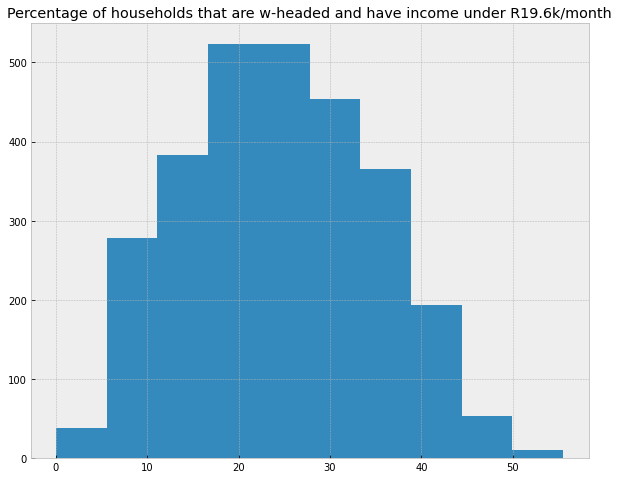

In [21]:
plt.style.use('bmh')

df['target'].hist(rwidth = 1,figsize=(10,8))
plt.title('Percentage of households that are w-headed and have income under R19.6k/month')
plt.show()

The majority of female-headed households represent 20-30% of total households.

#### Continuous variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expl

<Figure size 432x288 with 0 Axes>

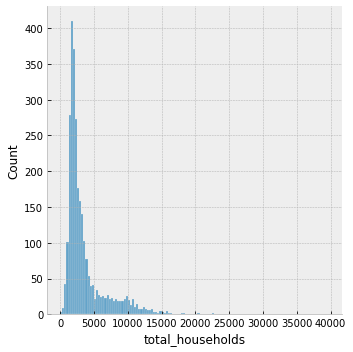

<Figure size 432x288 with 0 Axes>

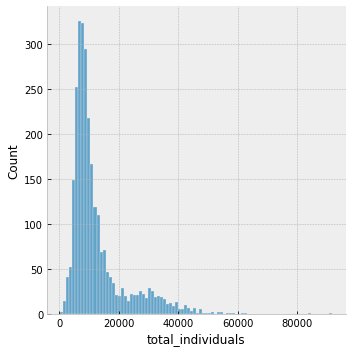

<Figure size 432x288 with 0 Axes>

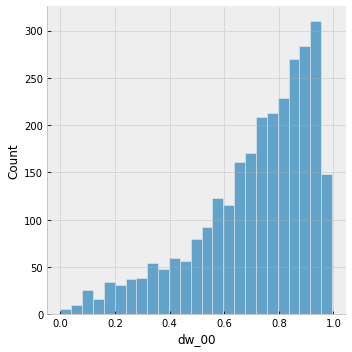

<Figure size 432x288 with 0 Axes>

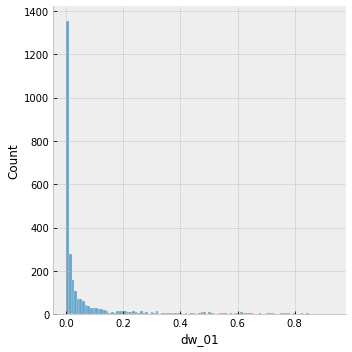

<Figure size 432x288 with 0 Axes>

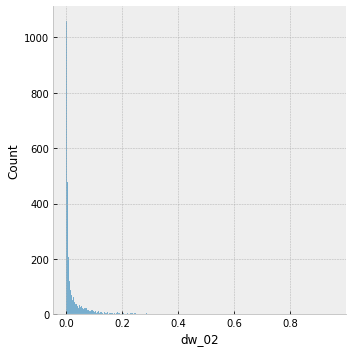

<Figure size 432x288 with 0 Axes>

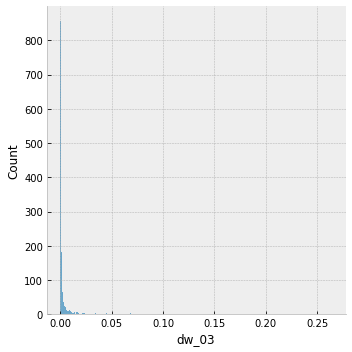

<Figure size 432x288 with 0 Axes>

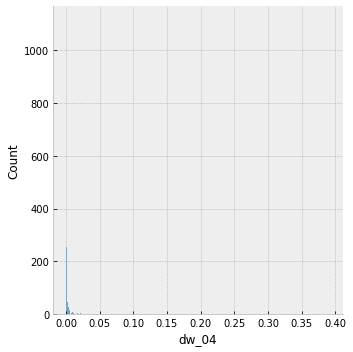

<Figure size 432x288 with 0 Axes>

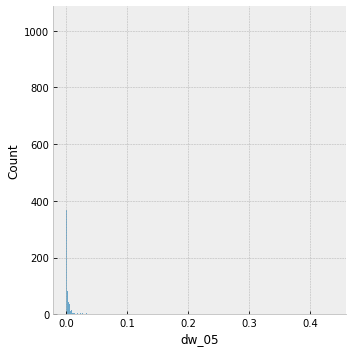

<Figure size 432x288 with 0 Axes>

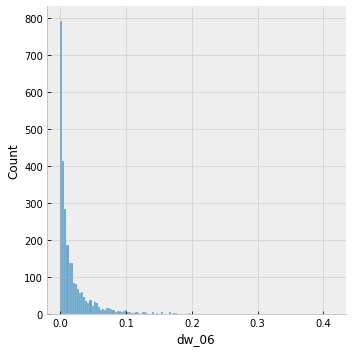

<Figure size 432x288 with 0 Axes>

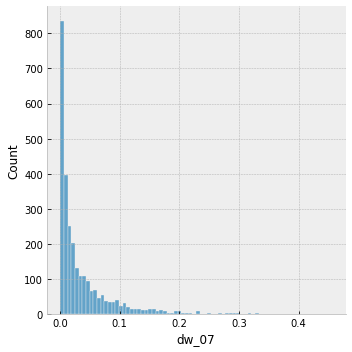

<Figure size 432x288 with 0 Axes>

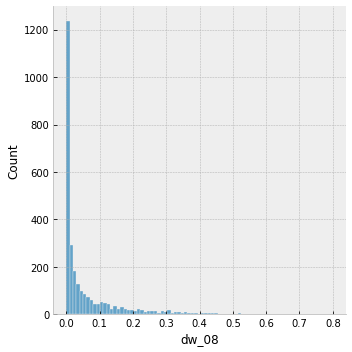

<Figure size 432x288 with 0 Axes>

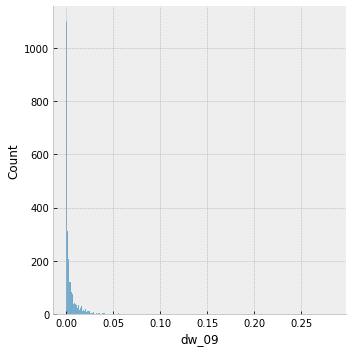

<Figure size 432x288 with 0 Axes>

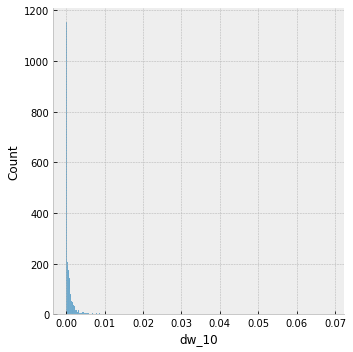

<Figure size 432x288 with 0 Axes>

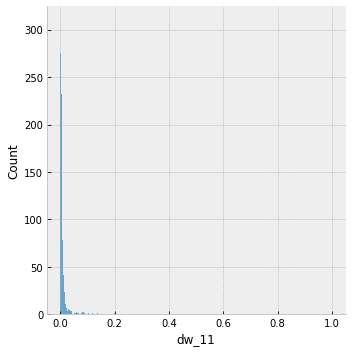

<Figure size 432x288 with 0 Axes>

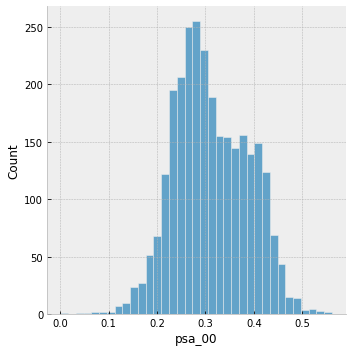

<Figure size 432x288 with 0 Axes>

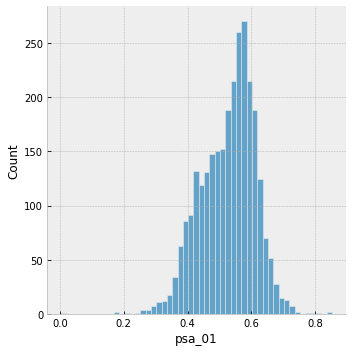

<Figure size 432x288 with 0 Axes>

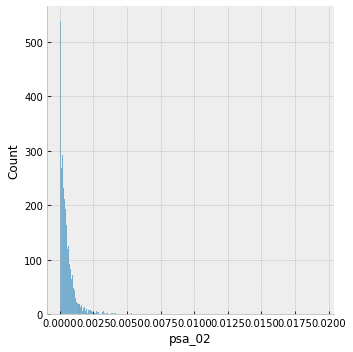

<Figure size 432x288 with 0 Axes>

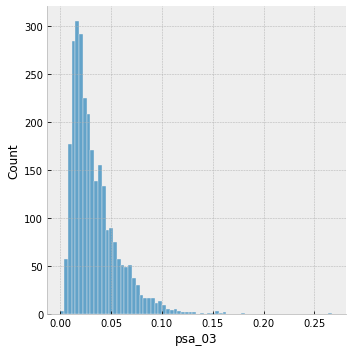

<Figure size 432x288 with 0 Axes>

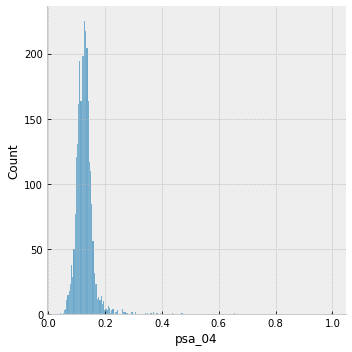

<Figure size 432x288 with 0 Axes>

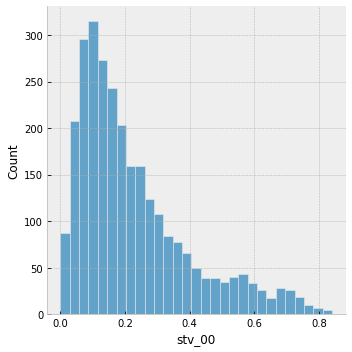

<Figure size 432x288 with 0 Axes>

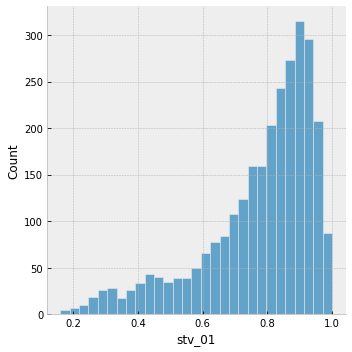

<Figure size 432x288 with 0 Axes>

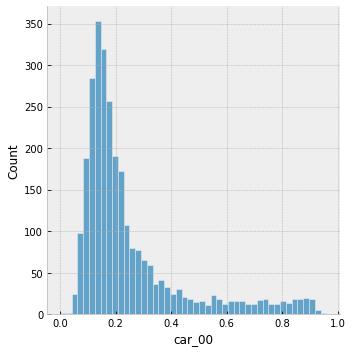

<Figure size 432x288 with 0 Axes>

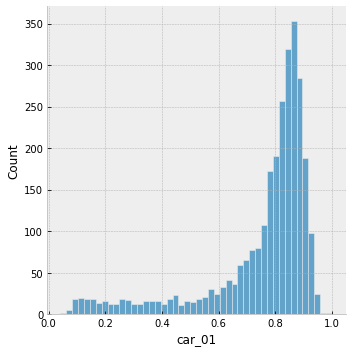

<Figure size 432x288 with 0 Axes>

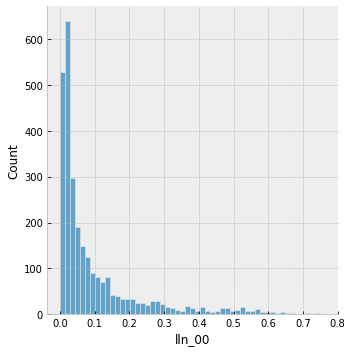

<Figure size 432x288 with 0 Axes>

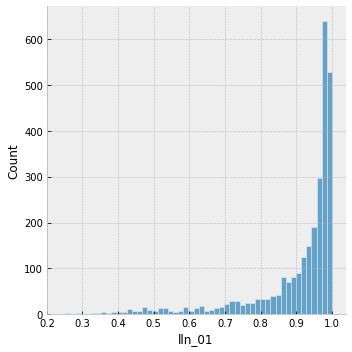

<Figure size 432x288 with 0 Axes>

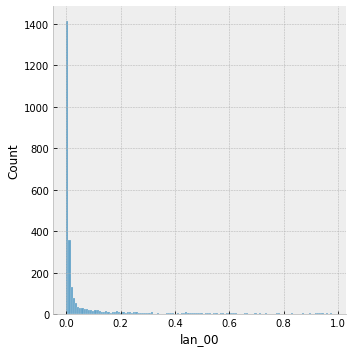

<Figure size 432x288 with 0 Axes>

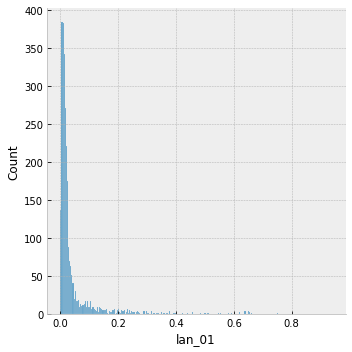

<Figure size 432x288 with 0 Axes>

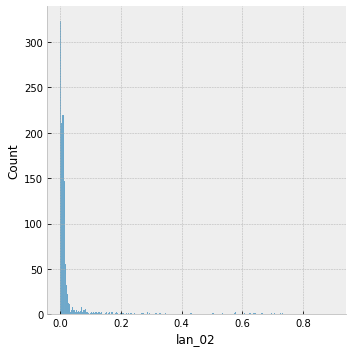

<Figure size 432x288 with 0 Axes>

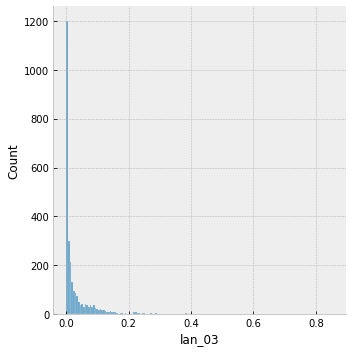

<Figure size 432x288 with 0 Axes>

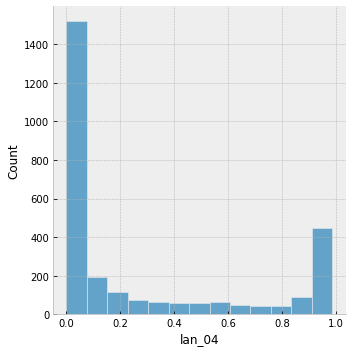

<Figure size 432x288 with 0 Axes>

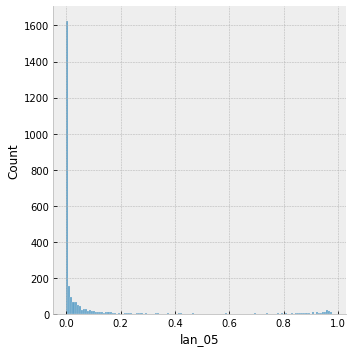

<Figure size 432x288 with 0 Axes>

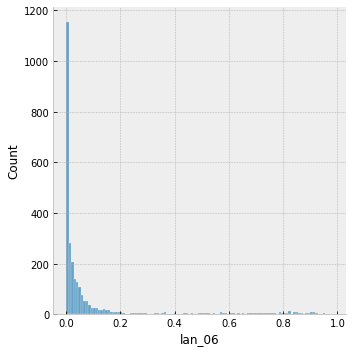

<Figure size 432x288 with 0 Axes>

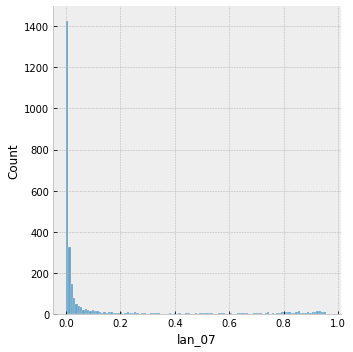

<Figure size 432x288 with 0 Axes>

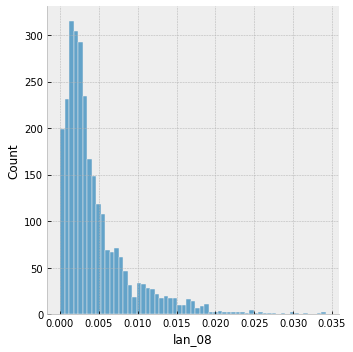

<Figure size 432x288 with 0 Axes>

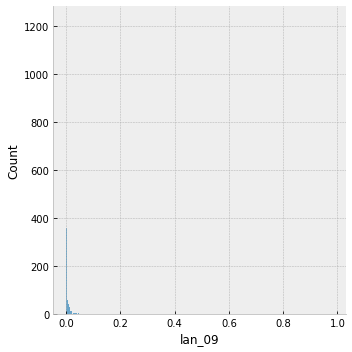

<Figure size 432x288 with 0 Axes>

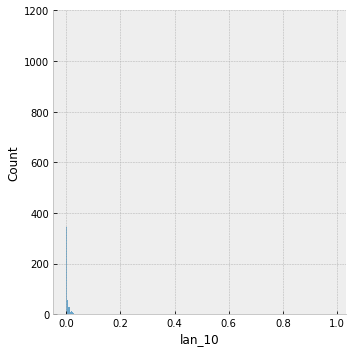

<Figure size 432x288 with 0 Axes>

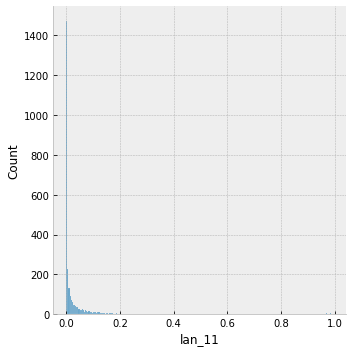

<Figure size 432x288 with 0 Axes>

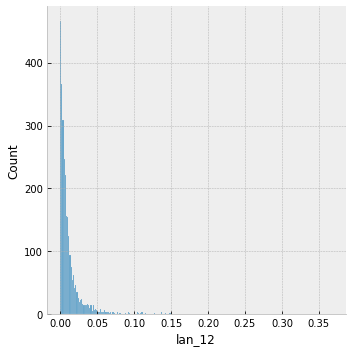

<Figure size 432x288 with 0 Axes>

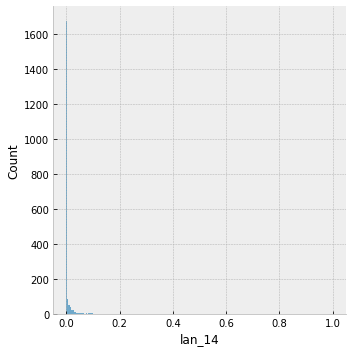

<Figure size 432x288 with 0 Axes>

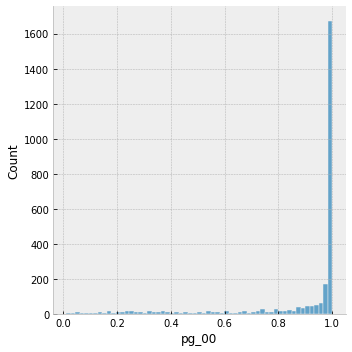

<Figure size 432x288 with 0 Axes>

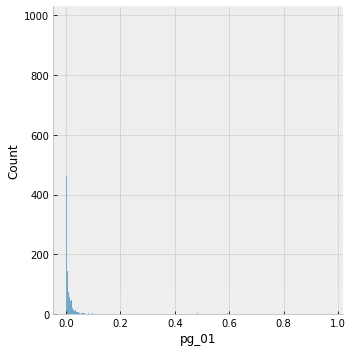

<Figure size 432x288 with 0 Axes>

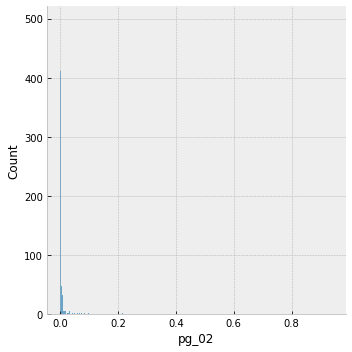

<Figure size 432x288 with 0 Axes>

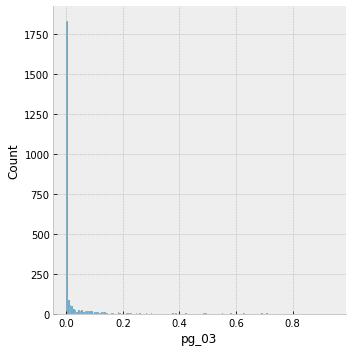

<Figure size 432x288 with 0 Axes>

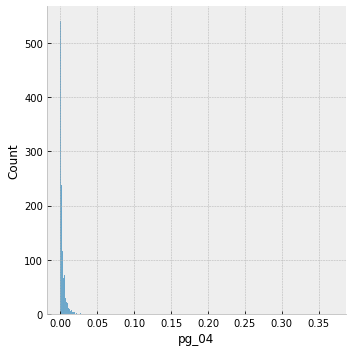

<Figure size 432x288 with 0 Axes>

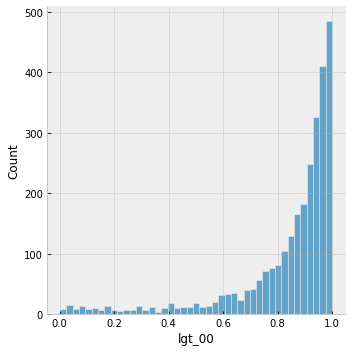

<Figure size 432x288 with 0 Axes>

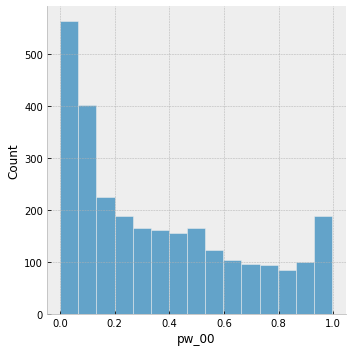

<Figure size 432x288 with 0 Axes>

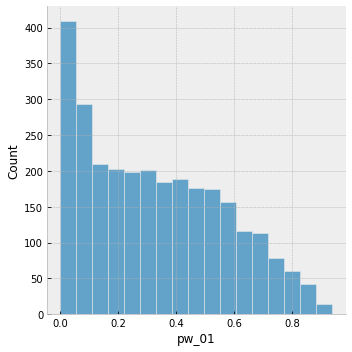

<Figure size 432x288 with 0 Axes>

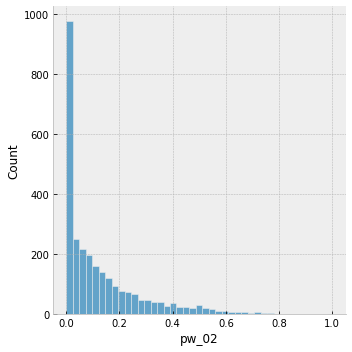

<Figure size 432x288 with 0 Axes>

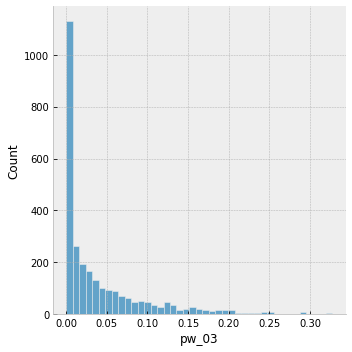

<Figure size 432x288 with 0 Axes>

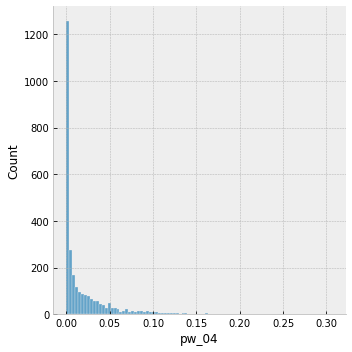

<Figure size 432x288 with 0 Axes>

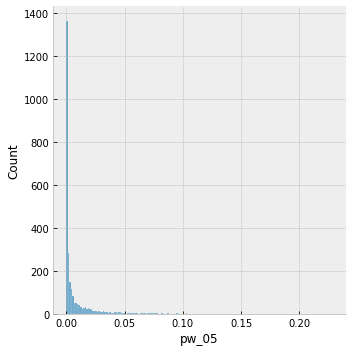

<Figure size 432x288 with 0 Axes>

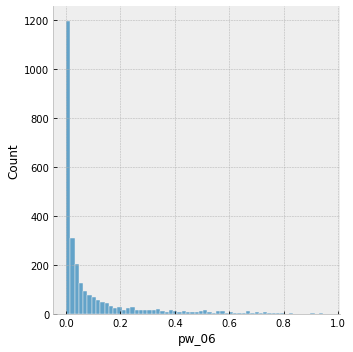

<Figure size 432x288 with 0 Axes>

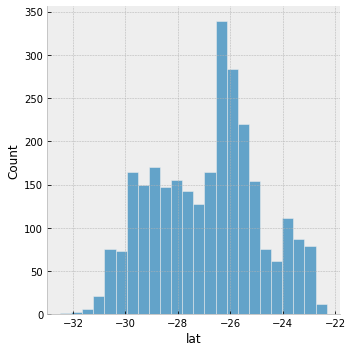

<Figure size 432x288 with 0 Axes>

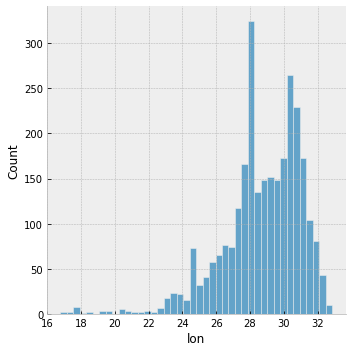

<Figure size 432x288 with 0 Axes>

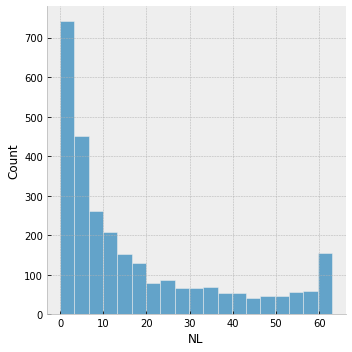

In [22]:
for col in df.select_dtypes(float):
    if 'target' not in col:
        plt.figure()
        sns.displot(df[col])

Data in float variables is distributed asymmetrically and is not normalized.

In [23]:
for col in df.select_dtypes(int):
    print(f"{col:-<50} {df[col].sum()}")

dw_12--------------------------------------------- 0
dw_13--------------------------------------------- 0
lan_13-------------------------------------------- 0
pw_07--------------------------------------------- 0
pw_08--------------------------------------------- 0


Data int-typed are all equal to 0

#### Discrete variables

In [24]:
for col in df.select_dtypes(object):
    print(f'{col:-<50} {len(df[col].unique()) }')

ward---------------------------------------------- 2822
ADM4_PCODE---------------------------------------- 2822
address------------------------------------------- 2716


No redundancy of neighborhood ID and corresponding code.

### Depth analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


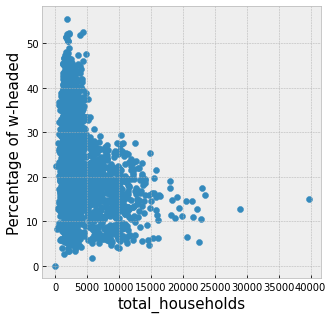

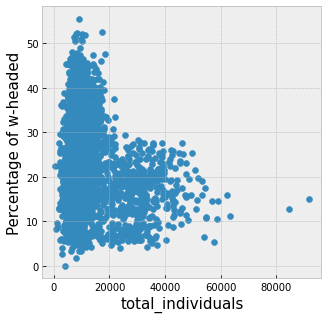

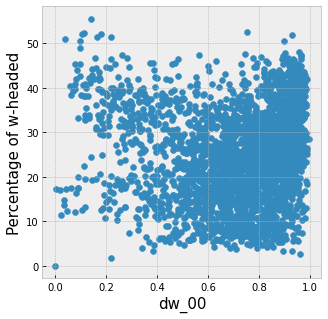

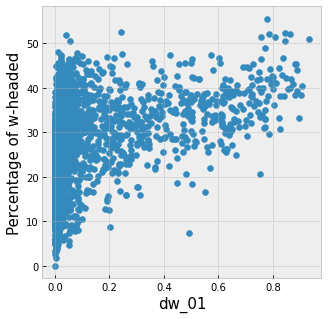

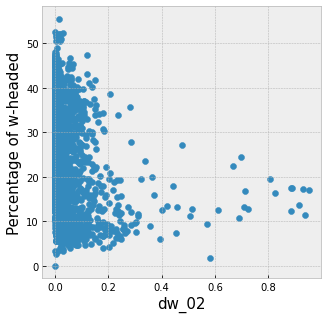

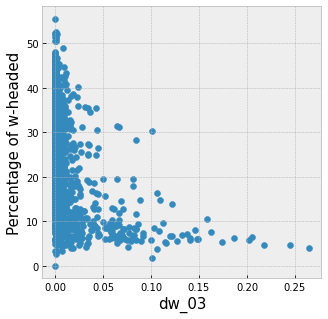

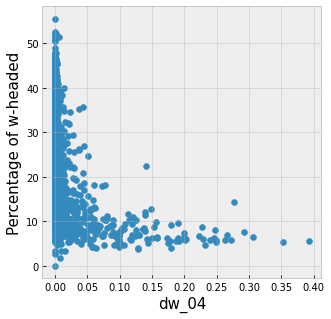

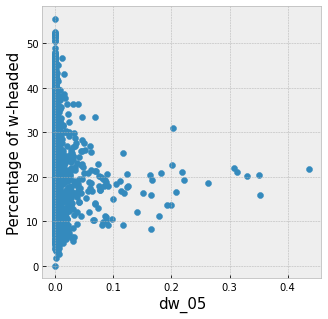

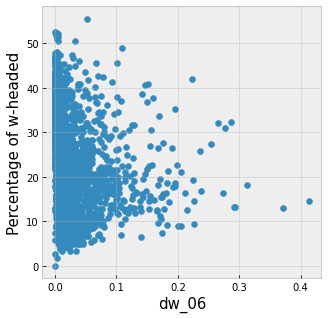

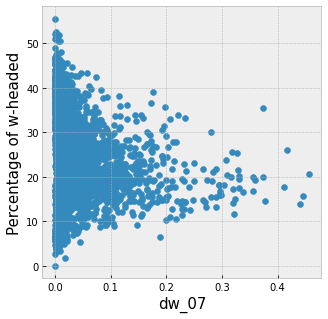

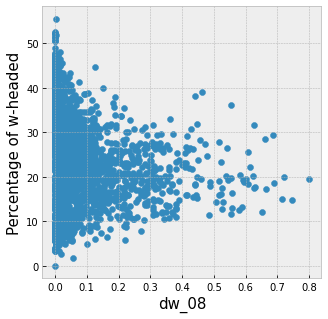

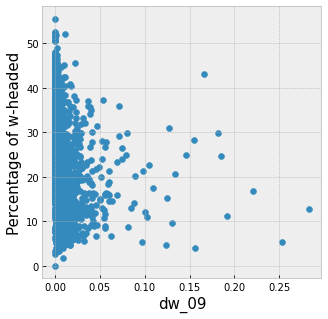

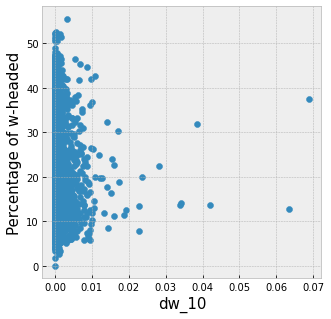

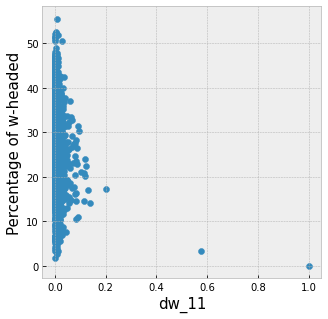

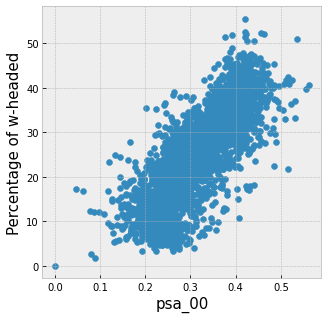

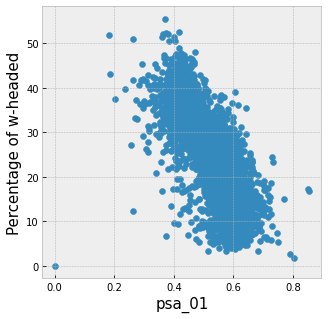

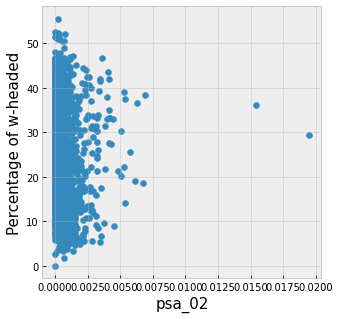

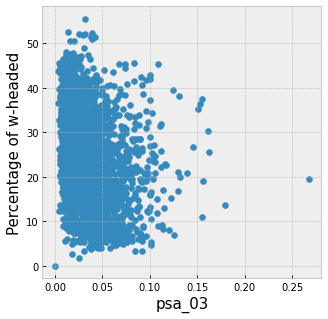

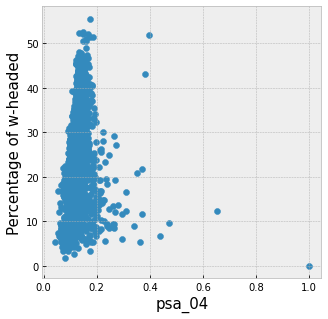

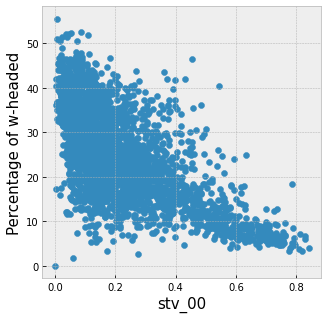

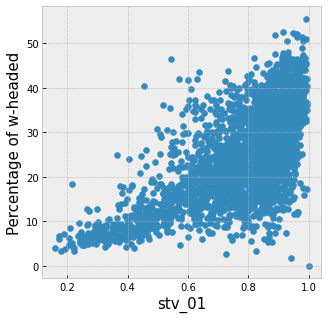

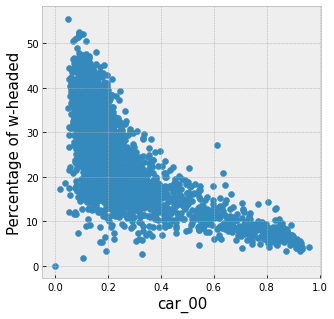

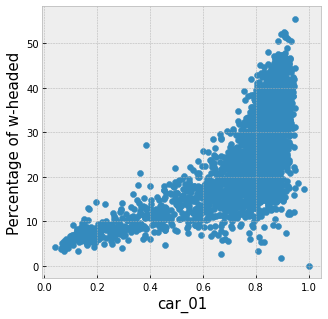

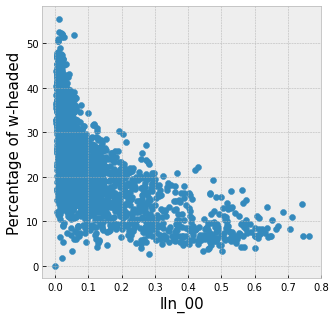

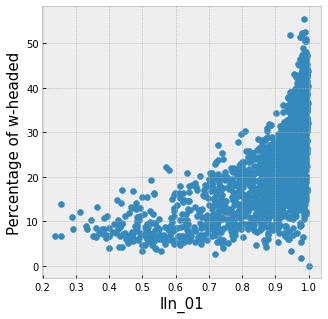

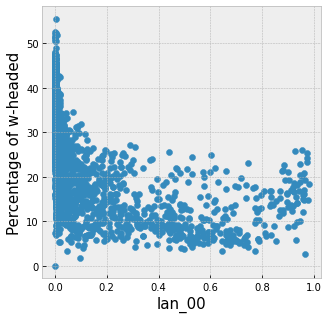

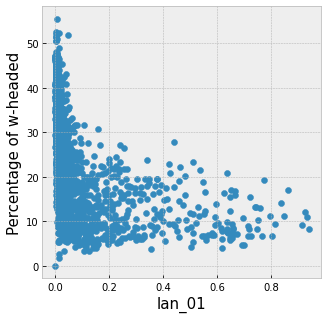

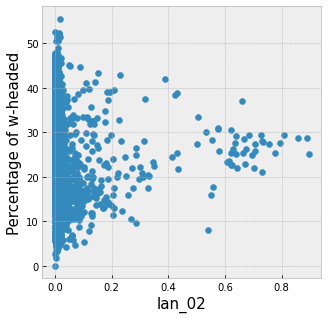

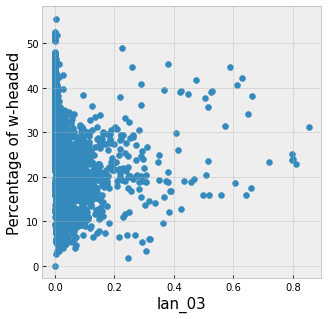

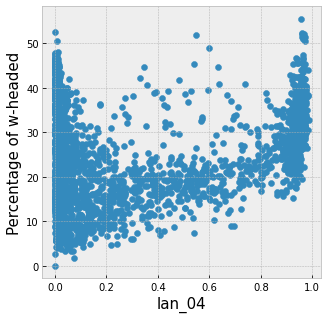

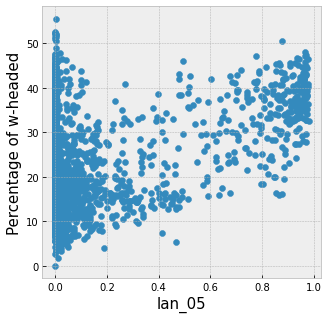

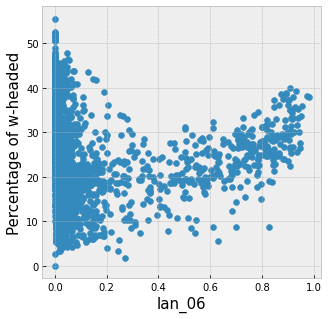

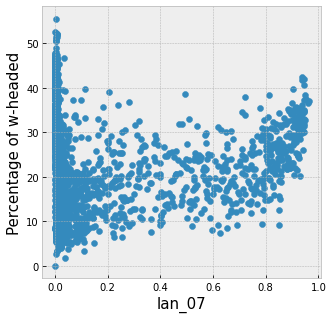

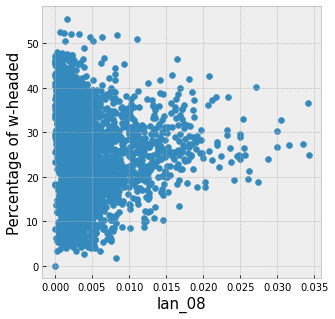

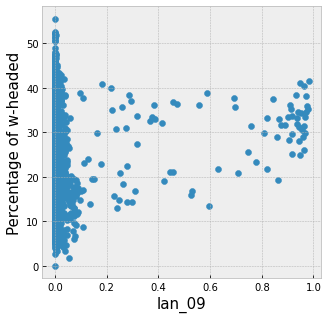

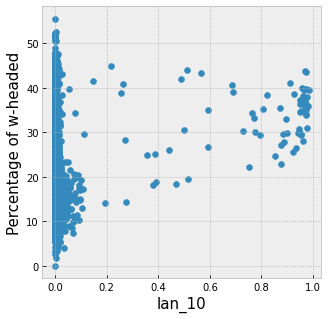

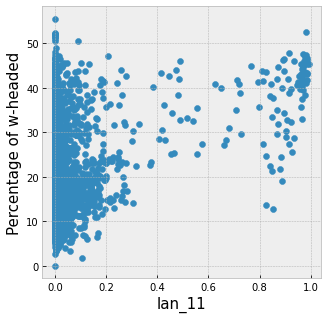

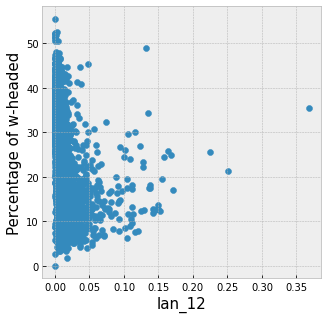

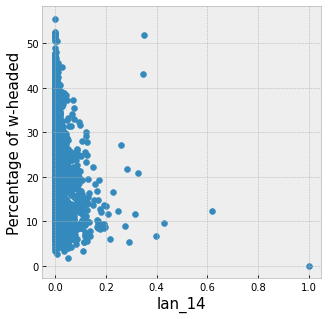

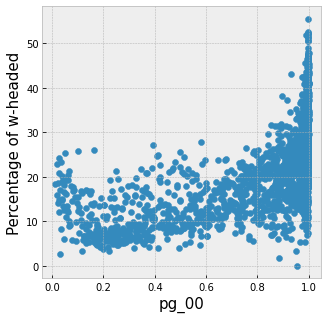

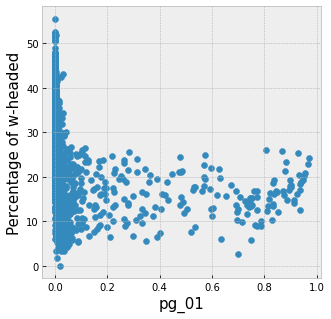

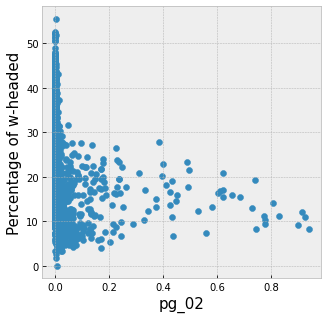

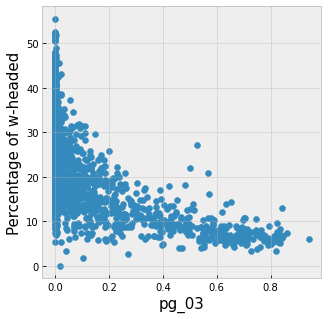

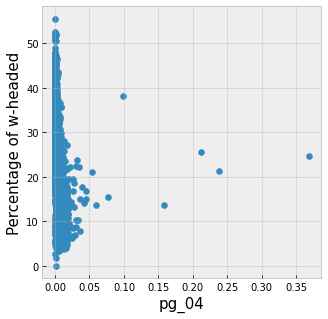

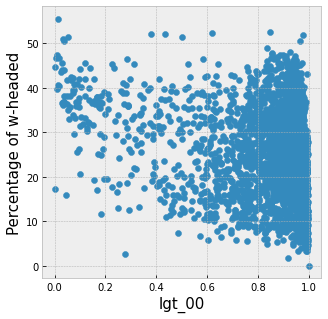

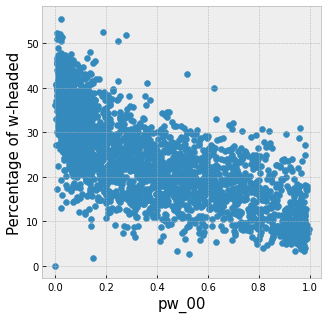

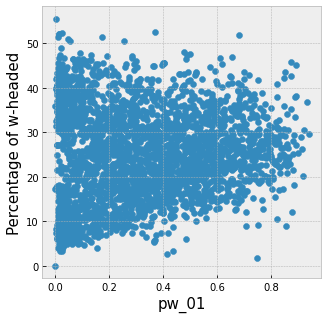

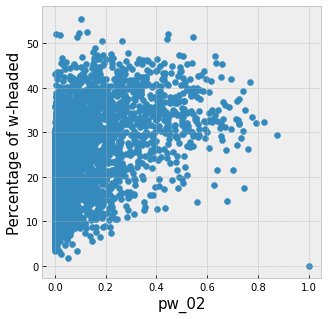

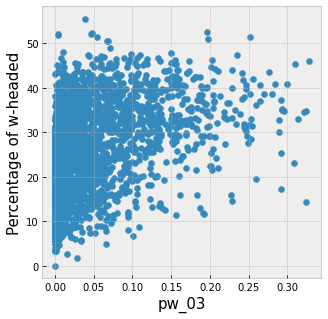

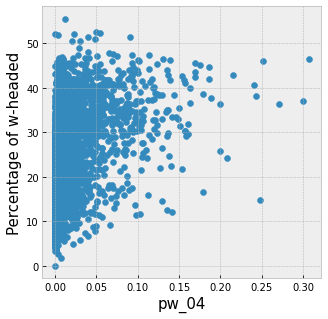

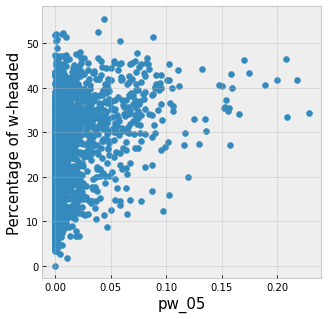

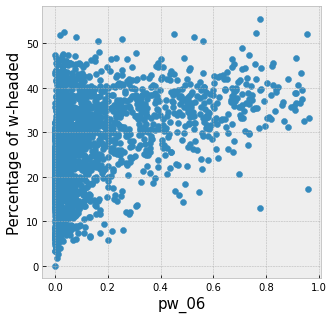

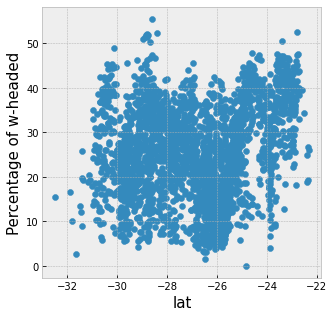

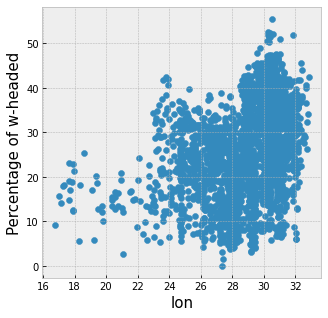

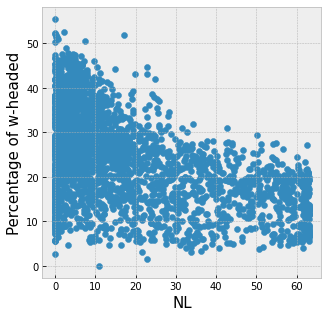

In [25]:
## relation target/continuous variables 
for col in df.select_dtypes(float):
    if col != 'target':
        fig ,ax = plt.subplots(figsize=(5,5))
        ax.scatter(x=df[col],y=df['target'])
        plt.ylabel('Percentage of w-headed',fontsize=15)
        plt.xlabel(col,fontsize=15)

We distinguish that some variables show obvious linear dependencies with the target variable.
And some data has lots of outliers.

In [26]:
## relations variables continues
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.corr()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
total_households,1.000000,0.959244,-0.374833,-0.226119,-0.231304,0.222825,0.328743,0.314811,0.095374,0.284317,0.267116,0.240964,0.128285,-0.057963,-0.001159,NaN,NaN,-0.348228,0.304959,0.106763,0.321778,-0.189969,0.250416,-0.250416,0.253040,-0.253040,0.292774,-0.292774,-0.034003,0.384818,-0.019893,0.104534,-0.064717,-0.028589,-0.032726,-0.100976,-0.045081,-0.041664,0.048105,0.045326,0.373283,NaN,0.018370,-0.151855,-0.083354,0.221372,0.183153,0.108861,0.093197,0.337449,-0.097993,-0.140827,-0.149199,-0.121961,-0.110339,-0.228412,NaN,NaN,0.063018,0.032249,0.708701
total_individuals,0.959244,1.000000,-0.293827,-0.200350,-0.161183,0.178921,0.255194,0.245253,0.109852,0.252280,0.205278,0.186950,0.080483,-0.078160,-0.002963,NaN,NaN,-0.242333,0.187257,0.103006,0.353433,-0.157760,0.206140,-0.206140,0.200226,-0.200226,0.251397,-0.251397,-0.082232,0.340476,-0.015302,0.057173,0.027323,-0.031766,-0.067826,-0.131588,-0.053589,-0.034436,0.065083,0.053421,0.296255,NaN,-0.007718,-0.092933,-0.093178,0.229503,0.103576,0.077212,0.075161,0.288838,-0.094539,-0.127982,-0.135562,-0.103966,-0.084651,-0.174518,NaN,NaN,0.039653,0.104198,0.684853
target,-0.374833,-0.293827,1.000000,0.018461,0.458206,-0.232727,-0.338137,-0.385533,-0.146357,-0.248573,-0.177763,-0.186627,-0.235331,-0.128540,-0.109490,NaN,NaN,0.782472,-0.707506,-0.097613,-0.301572,0.203999,-0.664181,0.664181,-0.702831,0.702831,-0.637835,0.637835,-0.507942,-0.438704,-0.020163,-0.142685,0.232266,0.275263,-0.038563,-0.046968,-0.003930,0.066230,0.106548,0.210597,-0.325367,NaN,-0.287004,0.613346,-0.232792,-0.224005,-0.583908,-0.213812,-0.260286,-0.754536,0.113646,0.442441,0.440941,0.389467,0.349653,0.470676,NaN,NaN,0.120381,0.347088,-0.514398
dw_00,-0.226119,-0.200350,0.018461,1.000000,-0.614702,-0.356335,-0.154956,-0.126421,-0.076181,-0.181262,-0.228804,-0.364130,-0.076239,-0.025813,-0.119659,NaN,NaN,0.053266,0.061978,-0.100414,-0.215588,-0.116875,0.204563,-0.204563,0.103555,-0.103555,0.016995,-0.016995,0.080893,-0.112058,0.079717,-0.133999,-0.432648,0.284967,0.083131,0.100746,-0.061157,0.099285,0.111999,0.147429,-0.175611,NaN,-0.059788,-0.013708,0.070832,-0.062480,-0.007774,-0.046675,0.526407,0.098374,0.180496,-0.064290,-0.079610,-0.059986,-0.038534,-0.297510,NaN,NaN,0.348089,-0.152692,-0.133895
dw_01,-0.231304,-0.161183,0.458206,-0.614702,1.000000,0.000617,-0.075112,-0.112250,-0.095776,-0.099431,-0.236245,-0.223481,-0.102495,-0.009229,-0.016891,NaN,NaN,0.469828,-0.522799,0.036300,0.052726,0.199668,-0.389343,0.389343,-0.304002,0.304002,-0.243632,0.243632,-0.202522,-0.158659,-0.069958,-0.047451,0.610104,-0.167927,-0.184446,-0.161752,0.004287,-0.033338,-0.041126,-0.061126,-0.191934,NaN,-0.109161,0.229224,-0.121589,-0.094507,-0.182425,-0.107281,-0.600681,-0.407428,-0.203044,0.222130,0.250931,0.202204,0.211378,0.600377,NaN,NaN,-0.346198,0.349469,-0.338058
dw_02,0.222825,0.178921,-0.232727,-0.356335,0.000617,1.000000,0.199940,0.205096,0.015692,0.086548,-0.138369,-0.102479,0.104707,0.016612,-0.016776,NaN,NaN,-0.111500,0.022469,0.101216,0.221837,0.037600,0.232527,-0.232527,0.263602,-0.263602,0.294071,-0.294071,0.093623,0.347070,-0.024555,0.022487,0.080942,-0.119165,-0.104374,-0.119998,-0.062700,-0.047990,-0.037483,-0.084470,0.394650,NaN,0.224816,-0.240298,0.019088,0.205087,0.233521,0.112925,0.035062,0.341398,-0.266980,-0.135700,-0.128604,-0.096198,-0.061072,-0.040765,NaN,NaN,-0.126910,0.075945,0.304287
dw_03,0.328743,0.255194,-0.338137,-0.154956,-0.075112,0.199940,1.000000,0.724167,0.026997,0.030068,-0.101747,-0.073226,0.088665,0.003593,-0.004090,NaN,NaN,-0.198897,0.179108,0.090417,0.214318,-0.140442

In [27]:
df.corr()['target'].sort_values()[df.corr()['target'].sort_values() < 0]

pw_00               -0.754536
psa_01              -0.707506
car_00              -0.702831
stv_00              -0.664181
lln_00              -0.637835
pg_03               -0.583908
NL                  -0.514398
lan_00              -0.507942
lan_01              -0.438704
dw_04               -0.385533
total_households    -0.374833
dw_03               -0.338137
lan_12              -0.325367
psa_03              -0.301572
total_individuals   -0.293827
lan_14              -0.287004
lgt_00              -0.260286
dw_06               -0.248573
dw_09               -0.235331
pg_01               -0.232792
dw_02               -0.232727
pg_02               -0.224005
pg_04               -0.213812
dw_08               -0.186627
dw_07               -0.177763
dw_05               -0.146357
lan_03              -0.142685
dw_10               -0.128540
dw_11               -0.109490
psa_02              -0.097613
lan_07              -0.046968
lan_06              -0.038563
lan_02              -0.020163
lan_08    

The above variables have a negative covariance with the target variable.

In [28]:
df.corr()['target'].sort_values()[df.corr()['target'].sort_values() > 0.0]

dw_00     0.018461
lan_09    0.066230
lan_10    0.106548
pw_01     0.113646
lat       0.120381
psa_04    0.203999
lan_11    0.210597
lan_04    0.232266
lan_05    0.275263
lon       0.347088
pw_05     0.349653
pw_04     0.389467
pw_03     0.440941
pw_02     0.442441
dw_01     0.458206
pw_06     0.470676
pg_00     0.613346
lln_01    0.637835
stv_01    0.664181
car_01    0.702831
psa_00    0.782472
target    1.000000
Name: target, dtype: float64

The above variables have the largest covariances with the target.